# Week 8 Part 1 : Get LP APR (Following formula on Github using the last week volume and the latest volume)

In [1]:
import requests
import json
import pandas as pd

query = """query {
        farmsAtLatestBlock: pair( id:"0x0ed7e52944161450477ee417de9cd3a859b14fd0" ) {
            id
            volumeUSD
            reserveUSD
      }
        farmsOneWeekAgo: pair(id:"0x0ed7e52944161450477ee417de9cd3a859b14fd0", 
      block: { number: 9211000 }) #block of last week
  		{
            id
            volumeUSD
            reserveUSD
      }
}
"""
#print(query)
url = 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)
json_data = json.loads(r.text)

LP_HOLDERS_FEE = 0.0017
WEEKS_IN_A_YEAR = 52.1429
#Get Latest Volume 
latestVolume = float(json_data ['data']['farmsAtLatestBlock']['volumeUSD'])
#Get Last Week Volume 
weekAgoVolume = float(json_data ['data']['farmsOneWeekAgo']['volumeUSD'])
latestReserveUSD = float(json_data ['data']['farmsAtLatestBlock']['reserveUSD'])

if(weekAgoVolume): 
    volume7d = latestVolume - weekAgoVolume
    lpFees7d = volume7d * LP_HOLDERS_FEE
    lpFeesInAYear = lpFees7d * WEEKS_IN_A_YEAR
    Pool_liquidity = latestReserveUSD
    if(lpFeesInAYear):
        lpApr = (lpFeesInAYear * 100) / Pool_liquidity
        print("LP APR : ", lpApr)

## Result

In [ ]:
lpApr 

4.427817306129987

# Week 8 Part 2 : Get Daily Volume and LP-APR

## Data preparation

In [ ]:
from datetime import datetime
url2 = 'https://api.thegraph.com/subgraphs/name/pancakeswap/blocks'
timestamp = round(datetime.timestamp(datetime.now()))-86400
def getBlockNo(timestamp):
    q1 = "query{ blocks(first: 1, where: { timestamp_gt:"
    q2 = ", timestamp_lt:"
    q3 = "}){ number }}"
    query = q1+str(timestamp)+q2+(str(timestamp+600))+q3
    r = requests.post(url2, json={'query': query})
    return json.loads(r.text)['data']['blocks'][0]['number']
#getBlockNo(timestamp)



## Get Date, Timestamp, and Block No.
### *** Start date on 24/4/2021 because Pancakeswap V2 just existed (No V1) ***

In [ ]:
import pandas as pd
import pytz

def getDate(date):
    return date.strftime('%Y-%m-%d')
# Get range of datetime
dt = pd.date_range(start='24/4/2021', end='26/07/2021')
# Convert DateTime to string and store in list
dt_list = []
for x in dt:    
    strDate = getDate(x)
    dt_list.append(strDate)
print("_"*160)
print("<<List of DateTime>>")
print(dt_list)
print("_"*160)

# Convert DateTime to Timestamp
timestamp_list = []
for y in dt:
    y = y.replace(tzinfo=pytz.UTC)
    ts = datetime.timestamp(y)
    ts2 = int(ts)
    timestamp_list.append(ts2)
print("<<List of TimeStamp>>")
print(timestamp_list)
print("_"*160)

# Get Block Number from Timestamp
block_list = []
for z in timestamp_list:
    bnum = getBlockNo(z)
    block_list.append(bnum)
print("<<List of Block Number>>")
print(block_list)
print("_"*160)





________________________________________________________________________________________________________________________________________________________________
<<List of DateTime>>
['2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20', '2021

## Using GRAPH QL to get VolumeUSD and ReserveUSD

In [ ]:
import requests
import json
import pandas as pd

url = 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2'

volume_list = []
reserve_list = []
for i in block_list:
    q1 =  '''query { 
        farmsOnthatDate: pair(id:"0x0ed7e52944161450477ee417de9cd3a859b14fd0", 
      block: { number: '''
    q2 = str(i) 
    q3 = '''}) 
  		{
            id
            volumeUSD
            reserveUSD
      }
}'''
    query = (q1 + q2 + q3)
    #print(query)
    
    url = 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2'
    r = requests.post(url, json={'query': query})
    #print(r.status_code)
    #print(r.text)
    json_data = json.loads(r.text)
    #Get Volume 
    volume = float(json_data ['data']['farmsOnthatDate']['volumeUSD'])
    #Get Reserve
    reserve = float(json_data ['data']['farmsOnthatDate']['reserveUSD'])
    
    volume_list.append(volume)
    reserve_list.append(reserve)


In [ ]:
data = []
data.append([dt_list, timestamp_list, block_list,volume_list,reserve_list])
data

In [ ]:
LP_HOLDERS_FEE = 0.0017
DAYS_IN_A_YEAR = 365.242199 
#Get current Volume 
lpAPR_list = []
for i in range(0,93):
    yesterdayVolume = volume_list[i]
    todayVolume = volume_list[i+1]
    volume1d = todayVolume - yesterdayVolume
    print(volume1d)
    lpFees1d = volume1d * LP_HOLDERS_FEE
    lpFeesInAYear = lpFees1d * DAYS_IN_A_YEAR
    Pool_liquidity = reserve_list[i+1] #todayReserveUSD
    if(lpFeesInAYear):
        lpApr = (lpFeesInAYear * 100) / Pool_liquidity
    #print("Daily LP-APR")
    #print(lpApr)
    lpAPR_list.append(lpApr)
lpAPR_list.append(float('NaN'))

In [ ]:
df = pd.DataFrame(list(zip(dt_list, timestamp_list, block_list, volume_list, reserve_list, lpAPR_list)), 
columns=['Date','Timestamp','Block No', 'Volume USD', 'Reserve USD','LP APR'])

In [ ]:
df

,Date,Timestamp,Block No,Volume USD,Reserve USD,LP APR
0,2021-04-24,1619222400,6829027,0.000000e+00,4.950000e+00,7.290667
1,2021-04-25,1619308800,6857747,1.004580e+08,8.555536e+08,9.735299
2,2021-04-26,1619395200,6886436,2.796376e+08,1.142797e+09,10.217731
3,2021-04-27,1619481600,6915187,4.995501e+08,1.336365e+09,6.892485
4,2021-04-28,1619568000,6943651,6.604049e+08,1.449066e+09,5.440518
...,...,...,...,...,...,...
89,2021-07-22,1626912000,9364655,9.120545e+09,4.505205e+08,2.740153
90,2021-07-23,1626998400,9393526,9.140786e+09,4.586454e+08,2.940710
91,2021-07-24,1627084800,9422142,9.165640e+09,5.247819e+08,3.036051
92,2021-07-25,1627171200,9450776,9.192336e+09,5.459565e+08,1.882827


## LP APR Visualization

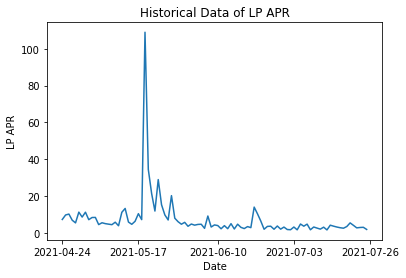

In [ ]:
from matplotlib import pyplot as plt

def getDate(date):
    return date.strftime('%Y-%m-%d')
def graph(data, date):
    plt.plot(data)
    plt.ylabel("LP APR")
    plt.xlabel("Date")
    plt.xticks([0,len(dt)//4,len(dt)//2,(len(dt)*3)//4,len(dt)-1],
    [getDate(date[0]),getDate(date[len(date)//4]),getDate(date[len(date)//2]), getDate(date[(len(date)*3)//4]),getDate(date[-1])])
    plt.title("Historical Data of LP APR")
    plt.show()
graph(lpAPR_list,dt)